In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import copy

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler

#Для зменшення розмірності даних
from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE

#Для зображень
from skimage import io
from sklearn.utils import shuffle


#Для обробки та класифікації текстових даних
import re
import string
import nltk
#nltk.download('stopwords')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud

#Для векторизації
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import os
import PIL
import tensorflow as tf
import matplotlib.cm as cm
from tensorflow import keras
from tensorflow.keras import layers
from sklearn import datasets
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import fetch_20newsgroups
from sklearn.datasets import fetch_20newsgroups
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.metrics import plot_confusion_matrix
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.metrics import mean_absolute_error, accuracy_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Посилання на датасет:
# https://www.kaggle.com/datasets/cpluzshrijayan/milkquality

In [270]:
milk = pd.read_csv('milknew.csv')
milk

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high


In [271]:
milk.isnull().any()

pH            False
Temprature    False
Taste         False
Odor          False
Fat           False
Turbidity     False
Colour        False
Grade         False
dtype: bool

In [272]:
nameDict={"Fat ":"Fat"}
milk=milk.rename(columns=nameDict)
milk

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high


In [273]:
label_encoder = LabelEncoder()
milk_copy = copy.deepcopy(milk)

categorical_features = ["Grade"]
for feature in categorical_features:
    print(milk_copy[feature].unique())
    milk_copy[feature]=label_encoder.fit_transform(milk_copy[feature])
    print(milk_copy[feature].unique())

['high' 'low' 'medium']
[0 1 2]


## Повнозв'язні нейромережі

In [274]:
X = milk.drop(["Grade"], axis = 1)
y = milk_copy["Grade"]

#variables=["pH", "Temprature", "Taste", "Odor", "Fat", "Turbidity", "Colour"]
#scaler = StandardScaler()
#X[variables] = scaler.fit_transform(X[variables])
#X

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [275]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1, stratify = milk["Grade"])

X_train =  np.array(X_train)
X_test = np.array(X_test)

In [276]:
X_train

array([[ 1.40804285,  1.06734732, -1.09829413, ..., -1.4293717 ,
        -0.98221664,  0.73386719],
       [-0.02153136, -0.91410734, -1.09829413, ...,  0.69960809,
         1.01810533,  0.73386719],
       [ 0.04994735,  0.07661999,  0.91050291, ..., -1.4293717 ,
        -0.98221664, -1.12426875],
       ...,
       [-0.09301007, -0.61688914,  0.91050291, ...,  0.69960809,
         1.01810533,  0.73386719],
       [ 0.55029833,  4.53489299,  0.91050291, ...,  0.69960809,
         1.01810533,  0.73386719],
       [ 0.12142606,  0.07661999, -1.09829413, ..., -1.4293717 ,
        -0.98221664, -2.75013769]])

In [277]:
# Будуємо повнозв'язну нейромережу

model_normalize =Sequential()
model_normalize.add(Dense(32,activation='relu',input_dim=7))
model_normalize.add(Dense(128,activation='relu'))
model_normalize.add(Dense(3,activation='softmax'))

opt = keras.optimizers.Adam()
#opt = keras.optimizers.Nadam(learning_rate=0.00005)

model_normalize.compile(loss='sparse_categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

In [278]:
history = model_normalize.fit(X_train, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
14/14 [==============================] - 1s 33ms/step - loss: 1.0954 - accuracy: 0.4066 - val_loss: 0.9166 - val_accuracy: 0.6038
Epoch 2/20
14/14 [==============================] - 0s 10ms/step - loss: 0.8758 - accuracy: 0.6288 - val_loss: 0.7625 - val_accuracy: 0.7170
Epoch 3/20
14/14 [==============================] - 0s 10ms/step - loss: 0.7397 - accuracy: 0.6998 - val_loss: 0.6402 - val_accuracy: 0.7642
Epoch 4/20
14/14 [==============================] - 0s 7ms/step - loss: 0.6241 - accuracy: 0.7920 - val_loss: 0.5382 - val_accuracy: 0.8113
Epoch 5/20
14/14 [==============================] - 0s 8ms/step - loss: 0.5294 - accuracy: 0.8156 - val_loss: 0.4536 - val_accuracy: 0.8585
Epoch 6/20
14/14 [==============================] - 0s 8ms/step - loss: 0.4509 - accuracy: 0.8794 - val_loss: 0.3865 - val_accuracy: 0.9245
Epoch 7/20
14/14 [==============================] - 0s 8ms/step - loss: 0.3871 - accuracy: 0.8960 - val_loss: 0.3315 - val_accuracy: 0.9245
Epoch 8/20
14/14 

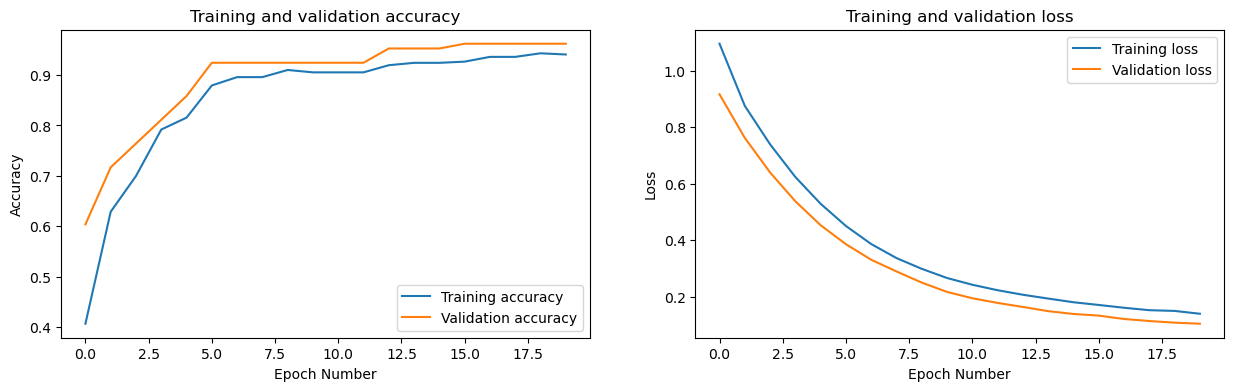

In [279]:
fig = plt.figure(figsize=(15,4))
fig.add_subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training accuracy', 'Validation accuracy'])
plt.title('Training and validation accuracy')
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')

fig.add_subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training loss', 'Validation loss'])
plt.title('Training and validation loss')
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.show()

In [280]:
model_normalize.evaluate(X_test, y_test)

17/17 [==============================] - 0s 4ms/step - loss: 0.1539 - accuracy: 0.9396


[0.1538952887058258, 0.9396226406097412]

## Обробка текстових даних та Рекурентна нейронна мережа

In [12]:
# Посилання на датасет Course Reviews University of Waterloo:
# https://www.kaggle.com/datasets/anthonysusevski/course-reviews-university-of-waterloo

In [13]:
data = pd.read_csv('course_data_clean.csv')
data

,course_code,course_title,num_ratings,useful,easy,liked,num_reviews,reviews,course_rating,course_rating_int
0,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,go to office hours and practice,liked course,1.0
1,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,One of my least favourite courses. Although th...,disliked course,0.0
2,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,It starts with a very low pace but after midte...,disliked course,0.0
3,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,Took this in 2018 with no programming experien...,liked course,1.0
4,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,I loved everything about cs 115. Great instruc...,liked course,1.0
...,...,...,...,...,...,...,...,...,...,...
14833,ASL 102R,American Sign Language 2,1,100%,75%,100%,1,Took this online with Georgia Whalen. As it wa...,liked course,1.0
14834,CS 136L,Tools and Techniques for Software Development,1,100%,100%,100%,1,I either designed or helped design the majorit...,liked course,1.0
14835,AFM 417,Special Topics in Accounting,0,NaN,NaN,NaN,1,Topic 3: Intro to Data Analytics,NaN,NaN
14836,ECON 472,Senior Honours Essay,0,100%,0%,NaN,1,Not sure if I liked this course yet. Definitel...,NaN,NaN


In [14]:
data.isnull().any()

course_code          False
course_title         False
num_ratings          False
useful                True
easy                  True
liked                 True
num_reviews          False
reviews               True
course_rating         True
course_rating_int     True
dtype: bool

In [15]:
data = data.dropna()

In [16]:
data.isnull().any()

course_code          False
course_title         False
num_ratings          False
useful               False
easy                 False
liked                False
num_reviews          False
reviews              False
course_rating        False
course_rating_int    False
dtype: bool

In [17]:
data = data.drop(['course_title', 'course_code', 'num_ratings', 'useful', 'easy', 'liked', 'num_reviews', 'course_rating_int'], axis=1)
data

,reviews,course_rating
0,go to office hours and practice,liked course
1,One of my least favourite courses. Although th...,disliked course
2,It starts with a very low pace but after midte...,disliked course
3,Took this in 2018 with no programming experien...,liked course
4,I loved everything about cs 115. Great instruc...,liked course
...,...,...
14830,This is a really wonderful course! Dr. Fraser ...,liked course
14831,While this course ended up being relatively in...,liked course
14832,Personally did not find Computational Biomecha...,disliked course
14833,Took this online with Georgia Whalen. As it wa...,liked course


In [18]:
from collections import Counter

Counter(data['course_rating'])

Counter({'liked course': 9781, 'disliked course': 4824})

In [19]:
categorical_features = ['course_rating']
for feature in categorical_features:
    print(data[feature].unique())
    data[feature]=label_encoder.fit_transform(data[feature])
    print(data[feature].unique())

['liked course' 'disliked course']
[1 0]


## Очистка тексту

In [20]:
for review in data['reviews']:
    review = review.lower()  #нижній регістр
    review = re.sub('[%s]' % re.escape(string.punctuation), ' ', review)  #пунктуація
    review = re.sub('\s{2,}', " ", review)  #лишні пробіли
    stop_words = stopwords.words('english')
    review = ' '.join([word for word in review.split(' ') if word not in stop_words])  #стоп слова

In [21]:
X = data.drop(['course_rating'], axis = 1)
y = data['course_rating']

In [22]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=500, split=' ') 
X=X.squeeze()
tokenizer.fit_on_texts(X.values)
X = tokenizer.texts_to_sequences(X.values)  #конвертує у послідовність цілих чисел
X = tf.keras.utils.pad_sequences(X)  #додаємо нулі, щоб всі вектори були однакової довжини

In [23]:
# Будуємо рекурентну нейромережу

model = Sequential()
model.add(Embedding(500, 120, input_length = X.shape[1]))
model.add(LSTM(units=64, return_sequences=True))
model.add(LSTM(units=64))
model.add(Dense(4,activation='softmax'))  #вихідний шар
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 577, 120)          60000     
                                                                 
 lstm (LSTM)                 (None, 577, 64)           47360     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense_3 (Dense)             (None, 4)                 260       
                                                                 
Total params: 140,644
Trainable params: 140,644
Non-trainable params: 0
_________________________________________________________________
None


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, random_state = 42)

In [25]:
model.fit(X_train, y_train, epochs = 3)

Epoch 1/3
411/411 [==============================] - 501s 1s/step - loss: 0.6412 - accuracy: 0.6713
Epoch 2/3
411/411 [==============================] - 490s 1s/step - loss: 0.5071 - accuracy: 0.7494
Epoch 3/3
411/411 [==============================] - 492s 1s/step - loss: 0.4656 - accuracy: 0.7745


In [26]:
model.evaluate(X_test,y_test)

46/46 [==============================] - 18s 350ms/step - loss: 0.4982 - accuracy: 0.7611


[0.49821561574935913, 0.7611225247383118]

## Згорткова нейронна мережа

In [79]:
# Посилання на датасет зображень:
# https://www.kaggle.com/datasets/mdwaquarazam/microorganism-image-classification

In [281]:
from os import listdir
from os.path import isfile, join

mypath_class_1='Micro_Organism/Amoeba/'
mypath_class_2='Micro_Organism/Hydra/'
mypath_class_3='Micro_Organism/Euglena/'
mypath_class_4='Micro_Organism/Paramecium/'


mypath_class_1_list = [mypath_class_1+f for f in listdir(mypath_class_1) if isfile(join(mypath_class_1, f))]
mypath_class_2_list = [mypath_class_2+f for f in listdir(mypath_class_2) if isfile(join(mypath_class_2, f))]
mypath_class_3_list = [mypath_class_3+f for f in listdir(mypath_class_3) if isfile(join(mypath_class_3, f))]
mypath_class_4_list = [mypath_class_4+f for f in listdir(mypath_class_4) if isfile(join(mypath_class_4, f))]

all_files=mypath_class_1_list+mypath_class_2_list+mypath_class_3_list+mypath_class_4_list

In [282]:
data=[(file_path,1) if('Hydra' in file_path) 
    else ((file_path,0)) if('Amoeba' in file_path)  
    else ((file_path,2)) if('Euglena' in file_path)
    else ((file_path,3)) for file_path in all_files]

<AxesSubplot:xlabel='labels', ylabel='count'>

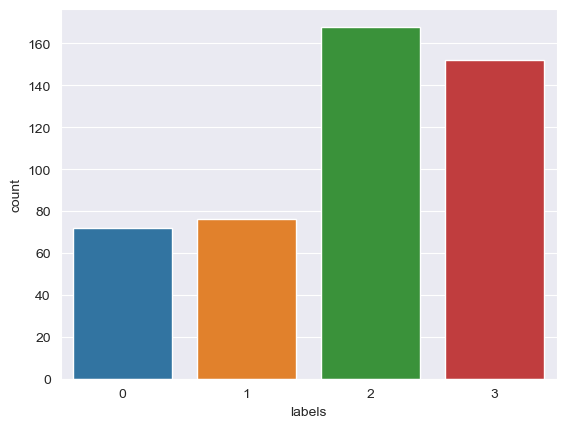

In [283]:
data=pd.DataFrame(data, columns=['path','labels'])

sns.set_style('darkgrid')
sns.countplot(x='labels',data=data)

In [284]:
data

,path,labels
0,Micro_Organism/Amoeba/Image_1.jpg,0
1,Micro_Organism/Amoeba/Image_10.jpg,0
2,Micro_Organism/Amoeba/Image_11.jpg,0
3,Micro_Organism/Amoeba/Image_14.jpg,0
4,Micro_Organism/Amoeba/Image_16.jpg,0
...,...,...
463,Micro_Organism/Paramecium/Image_94.jpg,3
464,Micro_Organism/Paramecium/Image_95.jpg,3
465,Micro_Organism/Paramecium/Image_96.jpg,3
466,Micro_Organism/Paramecium/Image_98.jpg,3


In [285]:
from skimage.transform import rescale, resize, downscale_local_mean
from skimage import color

def image_transform(paths, labels):
    x = []
    y = []
    temp = labels.reset_index(drop = True)
    i = 0
    for path in paths:
        image = io.imread(path)
        image_res = resize(image,  (150, 150))
        np_pic = np.array(image_res, dtype=np.float32)
        if (np_pic.shape == (150,150,3)):
            #np_pic = color.gray2rgb(np_pic) 
            x.append(np_pic)
            y.append(temp[i])

        i+=1
    return x, y

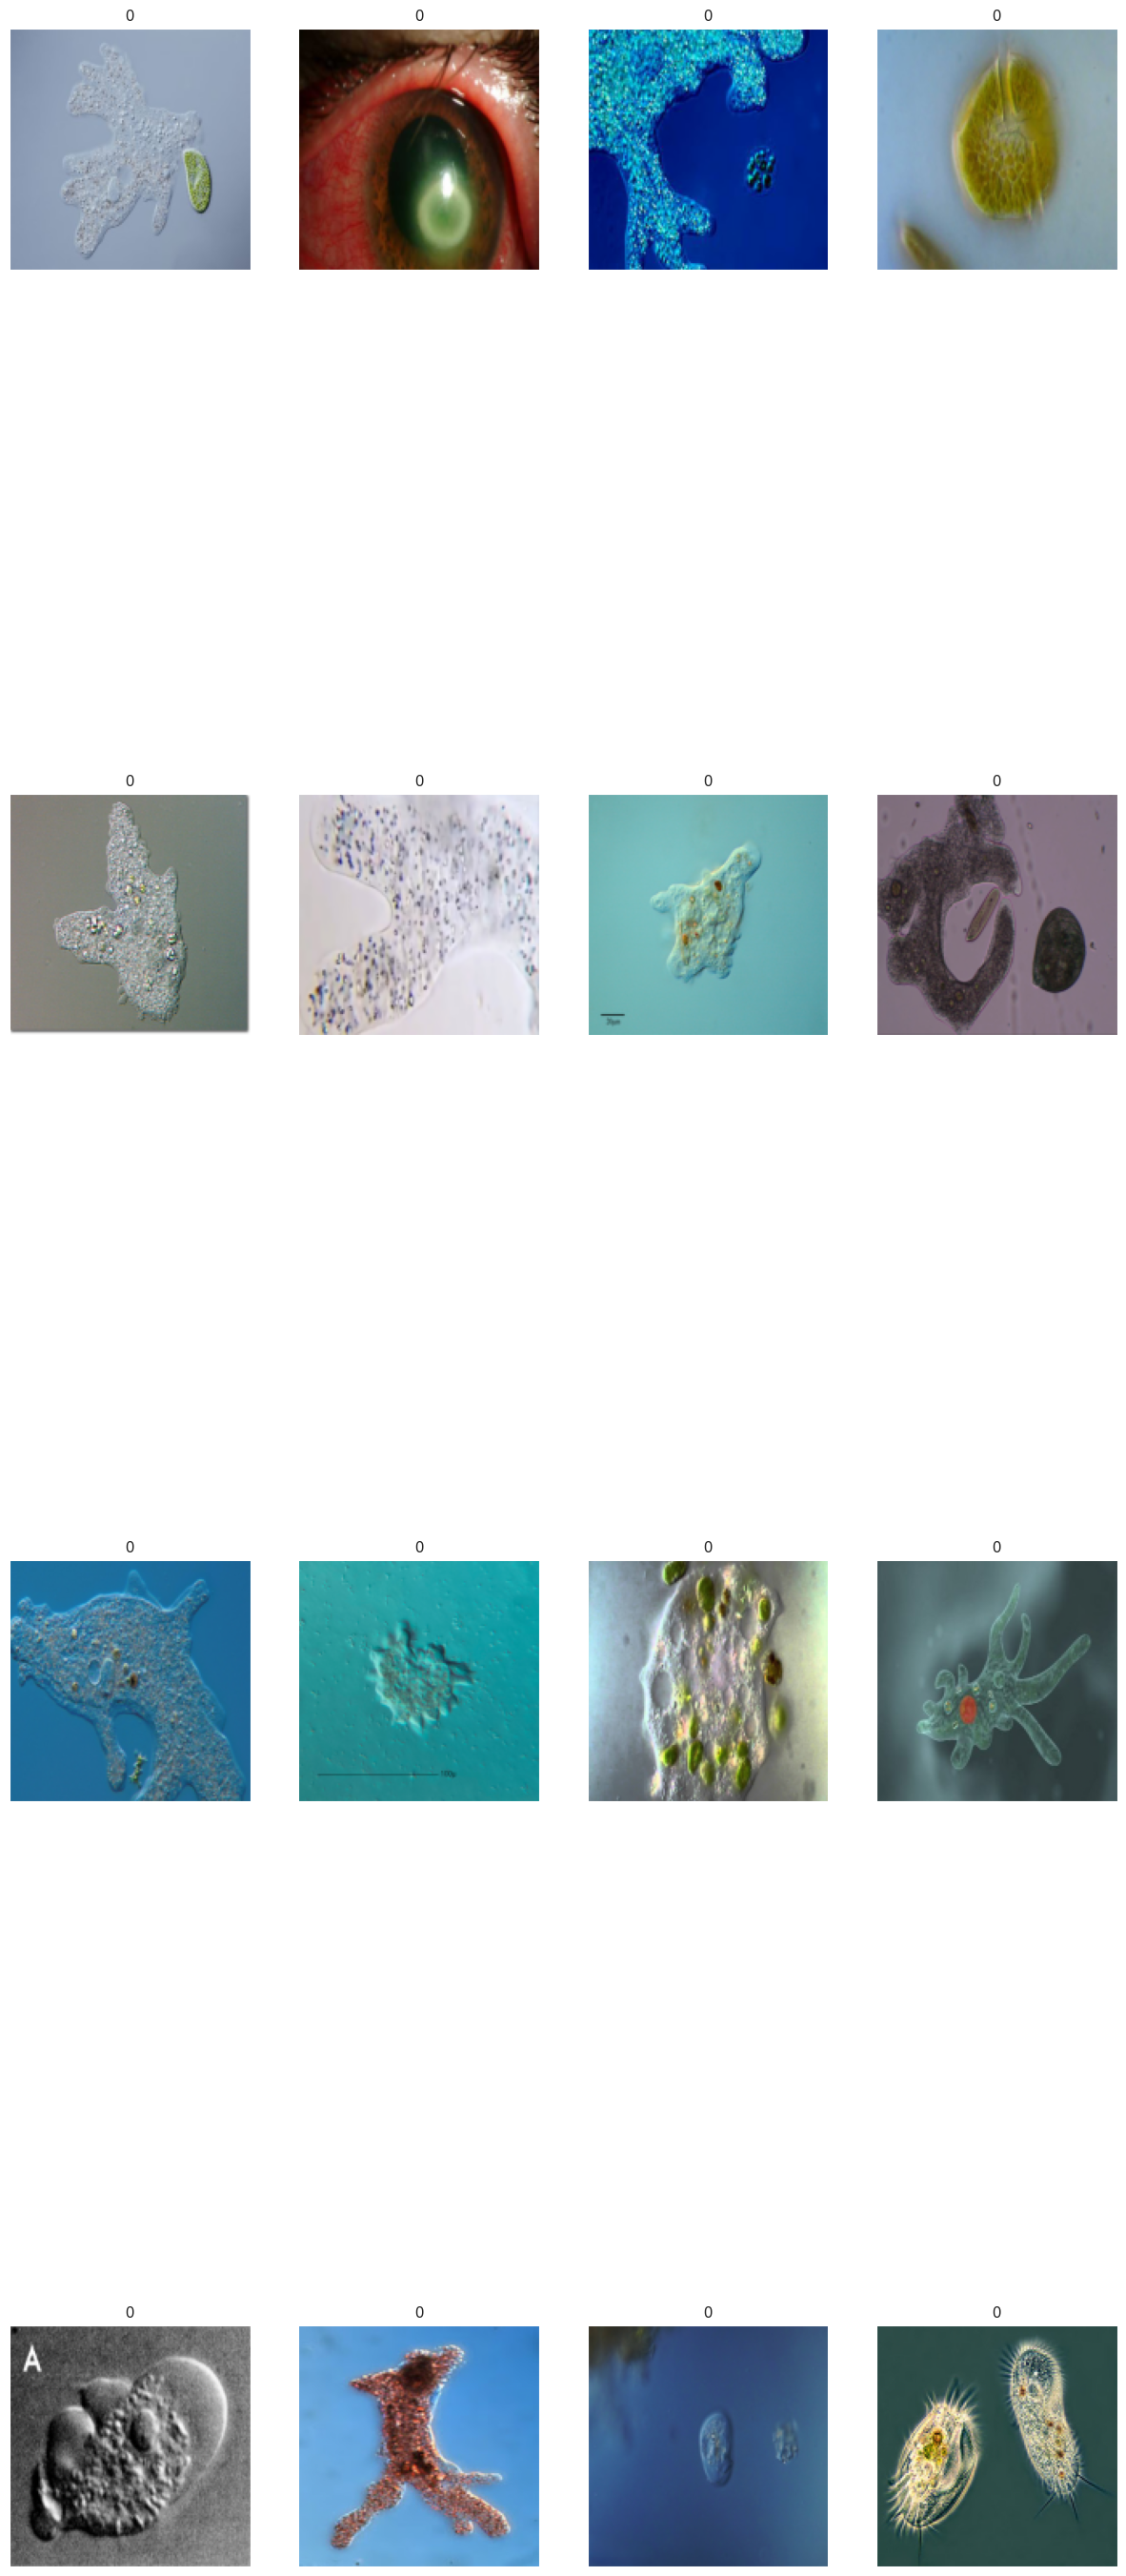

In [286]:
labels = data["labels"]
x, _=image_transform(all_files, labels)

fig = plt.figure(figsize=(15,40))

rows = 4

for row in range(rows):
    for column in range(4):
        i = row * 4 + column
        if i>len(data)-1:
            break                   
        ax = fig.add_subplot(rows, 4, i+1)
        ax.set_title(labels[i])     
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        plt.imshow(x[i])

In [287]:
X = data.drop(['labels'], axis = 1)
y = data['labels']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.5, random_state = 0)

In [288]:
from keras.layers import LSTM, Embedding, Dense, Conv2D, MaxPooling2D, Flatten, Dropout

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(filters=36, kernel_size=(3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(filters=40, kernel_size=(3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(filters=44, kernel_size=(3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='sigmoid'))

model.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 36)        10404     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 38, 38, 36)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 38, 38, 40)        13000     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 19, 19, 40)     

In [289]:
X_train, y_train = image_transform(X_train['path'].tolist(), y_train)
X_train=np.asarray(X_train)
print(X_train.shape)
print(len(X))
y_train=np.asarray(y_train).astype(np.int32)
print("y:" + str(y_train.shape))
X_train[0]

(231, 150, 150, 3)
468
y:(231,)


array([[[0.79767406, 0.76630926, 0.7584643 ],
        [0.79795635, 0.76741374, 0.75936925],
        [0.80174315, 0.7721256 , 0.7638566 ],
        ...,
        [0.87901527, 0.8476522 , 0.8385059 ],
        [0.87807643, 0.84775126, 0.83303994],
        [0.8790879 , 0.84998745, 0.83104736]],

       [[0.79952174, 0.76814455, 0.76030374],
        [0.80307615, 0.7712071 , 0.7636143 ],
        [0.8080313 , 0.7756088 , 0.76829505],
        ...,
        [0.8817531 , 0.8501934 , 0.8421449 ],
        [0.88013166, 0.8486843 , 0.8390052 ],
        [0.87750405, 0.8478409 , 0.83144593]],

       [[0.8008528 , 0.76948017, 0.76163703],
        [0.8041904 , 0.77281463, 0.7649731 ],
        [0.8071745 , 0.7757951 , 0.76795536],
        ...,
        [0.8856684 , 0.8496509 , 0.84406734],
        [0.8839125 , 0.84883136, 0.84060955],
        [0.8749068 , 0.84576315, 0.8264231 ]],

       ...,

       [[0.7825063 , 0.7519458 , 0.7377856 ],
        [0.78699285, 0.75607854, 0.74294984],
        [0.7877029 , 0

In [290]:
model.fit(X_train, y_train,epochs=20)

Epoch 1/20
8/8 [==============================] - 10s 1s/step - loss: 1.3524 - accuracy: 0.3247
Epoch 2/20
8/8 [==============================] - 9s 1s/step - loss: 1.3221 - accuracy: 0.3636
Epoch 3/20
8/8 [==============================] - 9s 1s/step - loss: 1.3199 - accuracy: 0.3680
Epoch 4/20
8/8 [==============================] - 9s 1s/step - loss: 1.2752 - accuracy: 0.3680
Epoch 5/20
8/8 [==============================] - 9s 1s/step - loss: 1.2926 - accuracy: 0.4199
Epoch 6/20
8/8 [==============================] - 9s 1s/step - loss: 1.2698 - accuracy: 0.4199
Epoch 7/20
8/8 [==============================] - 9s 1s/step - loss: 1.1942 - accuracy: 0.5281
Epoch 8/20
8/8 [==============================] - 9s 1s/step - loss: 1.1078 - accuracy: 0.5411
Epoch 9/20
8/8 [==============================] - 9s 1s/step - loss: 1.0850 - accuracy: 0.4935
Epoch 10/20
8/8 [==============================] - 9s 1s/step - loss: 1.0163 - accuracy: 0.5628
Epoch 11/20
8/8 [==============================]

In [291]:
X_test, y_test = image_transform(X_test['path'].tolist(), y_test)
X_test=np.asarray(X_test).astype(np.float32)
y_test=np.asarray(y_test).astype(np.int32)

In [292]:
model.evaluate( X_test, y_test)

8/8 [==============================] - 3s 306ms/step - loss: 1.4570 - accuracy: 0.5110


[1.4569756984710693, 0.5110132098197937]